### Task 1 — Exploratory Data Analysis (EDA) of Financial News

### Descriptive Statistics

#### Headline Analysis — Textual Lengths

In [11]:
# Notebook metadata & imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%matplotlib inline
sns.set(style="whitegrid")


In [14]:
from pathlib import Path

DATA_PATH = Path("../Data/newsData/raw_analyst_ratings.csv")

# Check if file exists
print("Exists:", DATA_PATH.exists())
print("Absolute path:", DATA_PATH.resolve())


Exists: True
Absolute path: C:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1\Data\newsData\raw_analyst_ratings.csv


In [15]:
# Import src modules
from data_loader import load_news_data
from data_cleaning import clean_news_data

# Load CSV
df = load_news_data(DATA_PATH)

# Clean dataframe
df = clean_news_data(df)

# Quick peek
print("Cleaned dataset shape:", df.shape)
df.head()


Cleaned dataset shape: (55987, 10)


,unnamed: 0,headline,url,publisher,date,stock,headline_length,pub_day,pub_hour,publisher_domain
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,benzinga insights,2020-06-05 10:30:54-04:00,A,39,2020-06-05,10,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,benzinga insights,2020-06-03 10:45:20-04:00,A,42,2020-06-03,10,NaN
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,lisa levin,2020-05-26 04:30:07-04:00,A,29,2020-05-26,4,NaN
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,lisa levin,2020-05-22 12:45:06-04:00,A,44,2020-05-22,12,NaN
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,vick meyer,2020-05-22 11:38:59-04:00,A,87,2020-05-22,11,NaN


In [24]:
# Basic sanity checks & overview
# Purpose: quick diagnostics and identifying missing values / duplicates

print("Columns:", df.columns.tolist())
print("\nMissing values per column:")
print(df.isna().sum())

print("\nDuplicate headlines count:", df.duplicated(subset=["headline", "date", "publisher"]).sum())

# Show basic dtypes
print("\nData types:")
print(df.dtypes)


Columns: ['unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock', 'headline_length', 'pub_day', 'pub_hour', 'publisher_domain', 'headline_word_len', 'weekday']

Missing values per column:
unnamed: 0               0
headline                 0
url                      0
publisher                0
date                     0
stock                    0
headline_length          0
pub_day                  0
pub_hour                 0
publisher_domain     54788
headline_word_len        0
weekday                  0
dtype: int64

Duplicate headlines count: 19926

Data types:
unnamed: 0                               int64
headline                                object
url                                     object
publisher                               object
date                 datetime64[ns, UTC-04:00]
stock                                   object
headline_length                          int64
pub_day                                 object
pub_hour                                 int3

Headline character length statistics:
       headline_length
count     55987.000000
mean         80.015254
std          56.126094
min          12.000000
25%          42.000000
50%          63.000000
75%          91.000000
max         512.000000


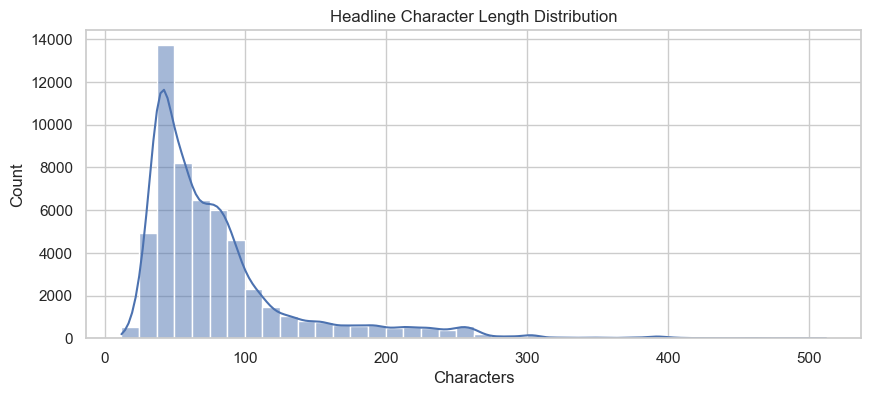

In [16]:
# Descriptive stats for headline length
desc = df[['headline_length']].describe()
print("Headline character length statistics:")
print(desc)

# Histogram
plt.figure(figsize=(10,4))
sns.histplot(df['headline_length'], bins=40, kde=True)
plt.title("Headline Character Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Count")
plt.show()


In [18]:
#compute headline word length
df['headline_word_len'] = df['headline'].str.split().str.len()
desc_words = df[['headline_word_len']].describe()
print(desc_words)


       headline_word_len
count       55987.000000
mean           12.435726
std             8.458581
min             2.000000
25%             7.000000
50%            10.000000
75%            14.000000
max            77.000000


Top 20 publishers by number of articles:
publisher
benzinga newsdesk          14750
lisa levin                 12408
etf professor               4362
paul quintaro               4212
benzinga newsdesk           3177
benzinga insights           2332
vick meyer                  2128
charles gross               1790
hal lindon                  1470
benzinga_newsdesk           1239
eddie staley                1003
vishwanath@benzinga.com      924
shanthi rexaline             887
monica gerson                611
wayne duggan                 465
nelson hem                   345
jayson derrick               337
craig jones                  310
luke@benzinga.com            271
javier hasse                 250
Name: count, dtype: int64


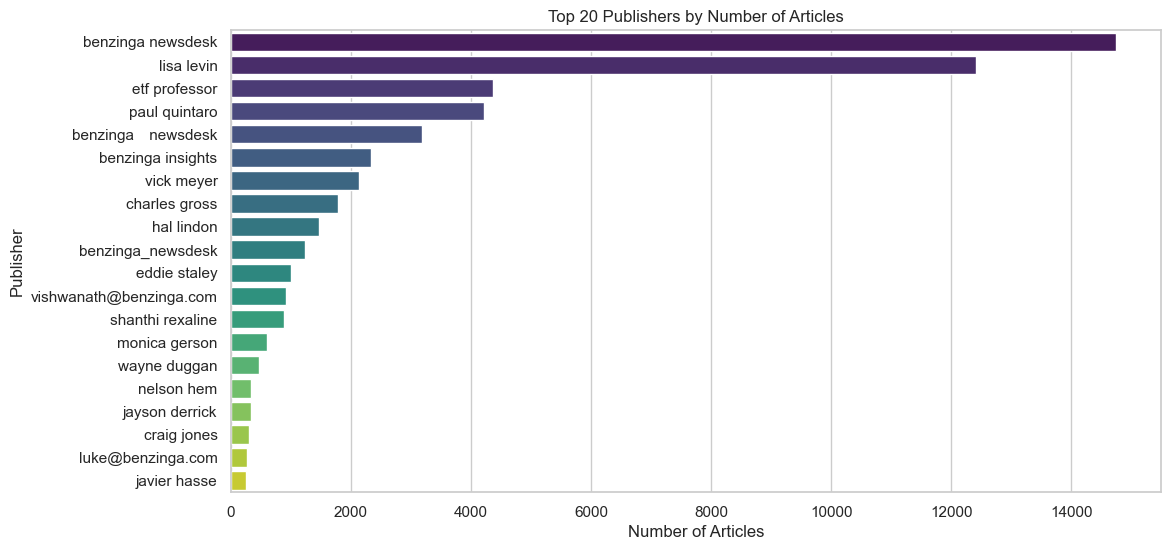

In [19]:
# Count articles per publisher (emails kept)
publisher_counts = df['publisher'].value_counts()
top_publishers = publisher_counts.head(20)

print("Top 20 publishers by number of articles:")
print(top_publishers)

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title("Top 20 Publishers by Number of Articles")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.show()


#### Publication Date Trends

Top 5 days with most articles:
pub_day
2020-03-12    973
2020-06-05    932
2020-06-10    806
2020-06-09    804
2020-06-08    765
dtype: int64


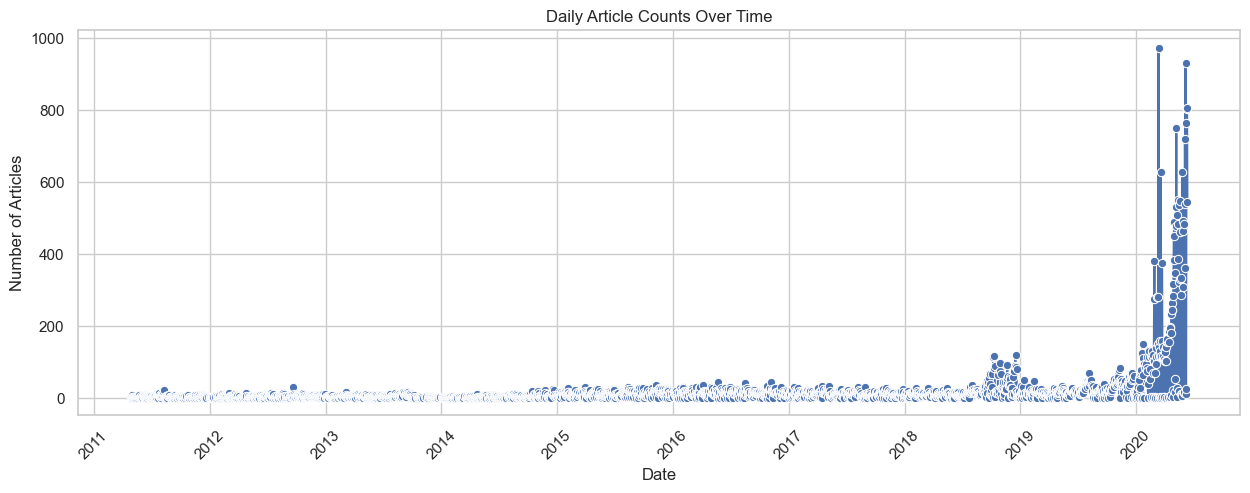

In [20]:
# Daily Counts
daily_counts = df.groupby('pub_day').size()

# Show top 5 busiest days
print("Top 5 days with most articles:")
print(daily_counts.sort_values(ascending=False).head())

# Plot
plt.figure(figsize=(15,5))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o')
plt.title("Daily Article Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Articles per weekday:
weekday
Monday       10322
Tuesday      11002
Wednesday    11891
Thursday     12688
Friday        9381
Saturday       267
Sunday         436
Name: count, dtype: int64


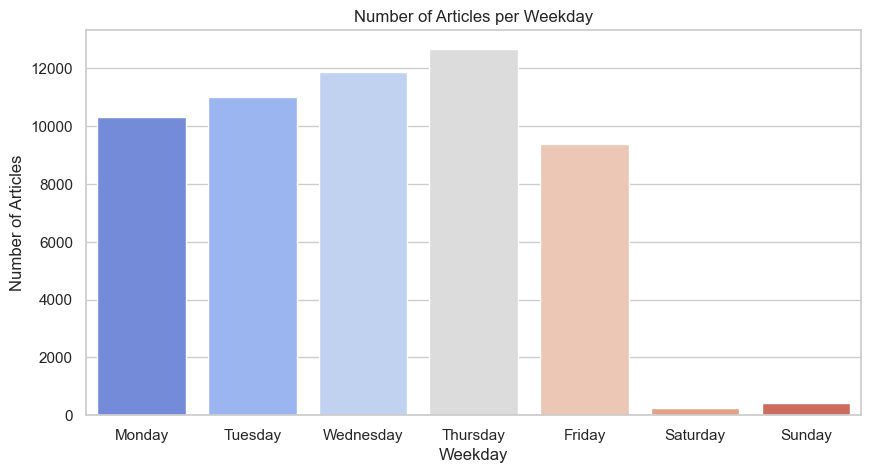

In [23]:
## Weekday Counts

# Create weekday column from date
df['weekday'] = df['date'].dt.day_name()  # Monday, Tuesday, etc.

# Now you can do the weekday counts
weekday_counts = df['weekday'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

print("Articles per weekday:")
print(weekday_counts)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='coolwarm')
plt.title("Number of Articles per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Articles")
plt.show()


### Text Analysis (Topic Modeling)

In [35]:
#  Top Keywords (Stopwords Removed)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1️⃣ Combine all headlines into one string
all_headlines = " ".join(df["headline"].dropna()).lower()

# 2️⃣ Remove punctuation
all_headlines = re.sub(r'[^\w\s]', '', all_headlines)

# 3️⃣ Split into words
words = all_headlines.split()

# 4️⃣ Remove stopwords (common English words)
words = [word for word in words if word not in ENGLISH_STOP_WORDS]

# 5️⃣ Count word frequency
word_counts = Counter(words)
top_keywords = word_counts.most_common(20)

# 6️⃣ Display top 20 keywords
print("Top 20 keywords in headlines (stopwords removed):")
for word, count in top_keywords:
    print(f"{word}: {count}")


Top 20 keywords in headlines (stopwords removed):
stocks: 12796
shares: 8374
52week: 8249
trading: 6573
hit: 5898
eps: 5530
price: 5043
companies: 4778
target: 4675
sales: 4422
higher: 4269
market: 4025
estimate: 3818
lows: 3741
session: 3394
maintains: 3266
new: 3107
yesterday: 3049
reports: 3016
q1: 3015


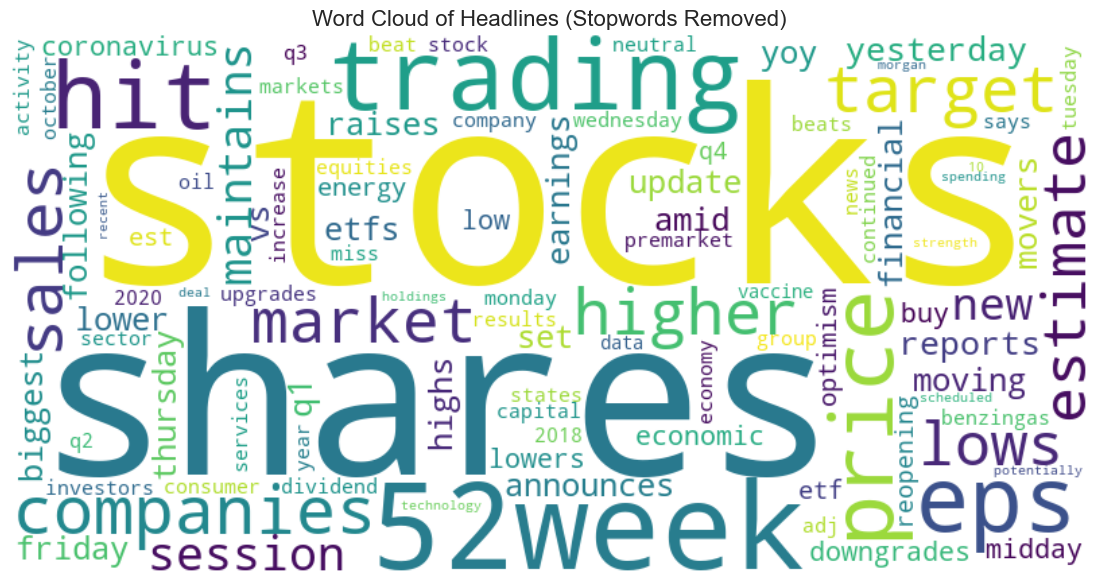

In [34]:
# 7️⃣ Optional — create WordCloud visualization
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=100
).generate_from_frequencies(word_counts)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Headlines (Stopwords Removed)", fontsize=16)
plt.show()


### Time Series Analysis:


In [36]:
#Time Series Analysis: Publication Frequency

import matplotlib.dates as mdates

# 1️⃣ Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 2️⃣ Articles per day
daily_counts = df.groupby(df['date'].dt.date).size()
print("Daily article counts (first 10 days):")
print(daily_counts.head(10))

Daily article counts (first 10 days):
date
2011-04-27    1
2011-04-28    2
2011-04-29    2
2011-04-30    1
2011-05-01    1
2011-05-02    9
2011-05-03    3
2011-05-05    3
2011-05-06    3
2011-05-07    2
dtype: int64


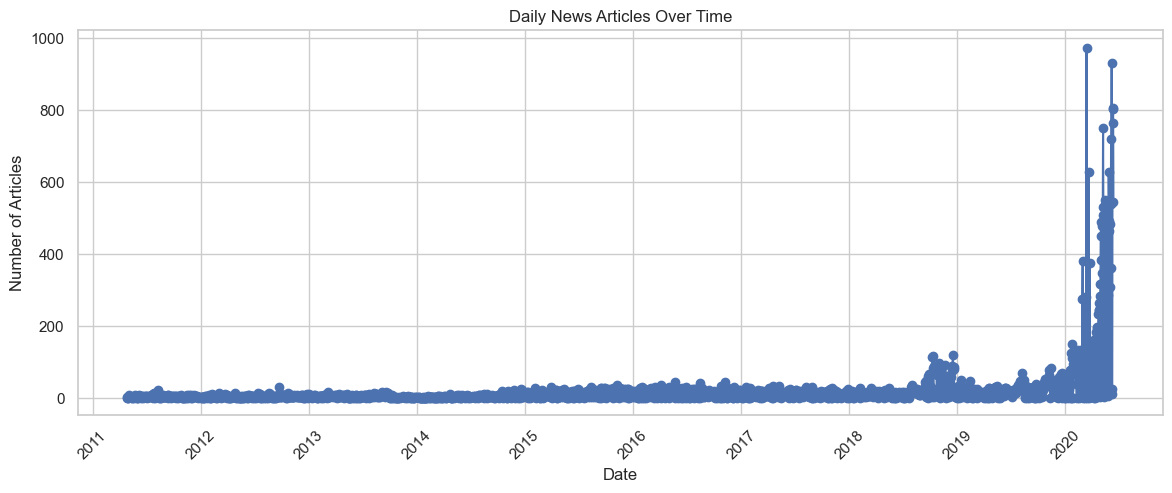

In [37]:
# 3️⃣ Plot daily publication frequency
plt.figure(figsize=(14,5))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')
plt.title("Daily News Articles Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [38]:
# 4️⃣ Articles by day of week
df['weekday'] = df['date'].dt.day_name()
weekday_counts = df['weekday'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
print("\nNumber of articles per weekday:")
print(weekday_counts)


Number of articles per weekday:
weekday
Monday       10322
Tuesday      11002
Wednesday    11891
Thursday     12688
Friday        9381
Saturday       267
Sunday         436
Name: count, dtype: int64


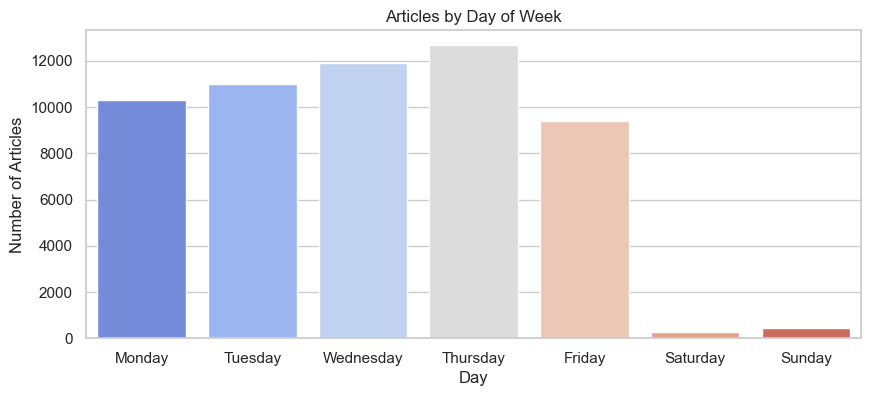

In [39]:
# 5️⃣ Plot articles by weekday
plt.figure(figsize=(10,4))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="coolwarm")
plt.title("Articles by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Articles")
plt.show()


Number of articles by publishing hour:
hour
0       67
1       14
2       57
3       93
4     1469
5     1829
6     2476
7     5033
8     5527
9     5965
10    7669
11    5701
12    5732
13    2710
14    2075
15    1612
16    3939
17    2800
18     704
19     227
20     131
21      82
22      48
23      27
Name: count, dtype: int64


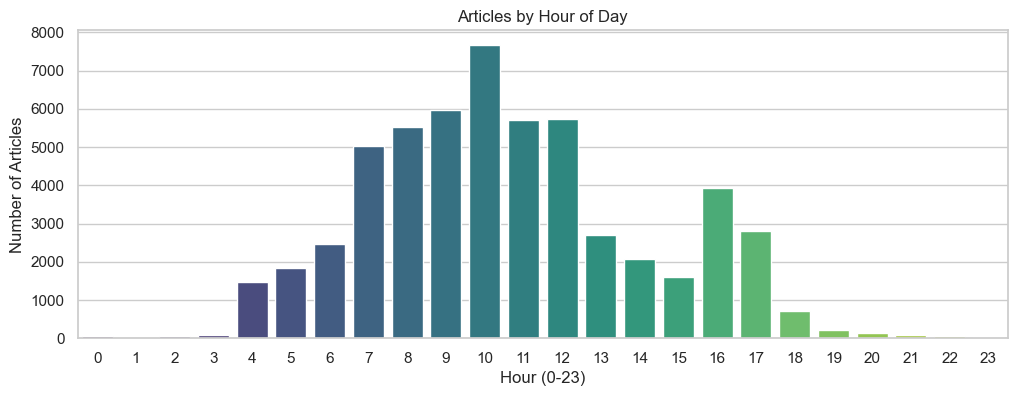

In [40]:
# 6️⃣ Articles by publishing hour
# Only if the 'date' column has timestamps
df['hour'] = df['date'].dt.hour
hour_counts = df['hour'].value_counts().sort_index()
print("\nNumber of articles by publishing hour:")
print(hour_counts)

# 7️⃣ Plot articles by publishing hour
plt.figure(figsize=(12,4))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="viridis")
plt.title("Articles by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Number of Articles")
plt.show()

### Publisher Analysis:


Top 20 publishers by number of articles:
publisher_norm
benzinga newsdesk          19182
lisa levin                 12408
etf professor               4362
paul quintaro               4212
benzinga insights           2332
vick meyer                  2128
charles gross               1790
hal lindon                  1470
eddie staley                1003
vishwanath@benzinga.com      924
shanthi rexaline             887
monica gerson                611
wayne duggan                 465
nelson hem                   345
jayson derrick               337
craig jones                  310
luke@benzinga.com            271
javier hasse                 250
luke j jacobi                166
elizabeth balboa             127
Name: count, dtype: int64


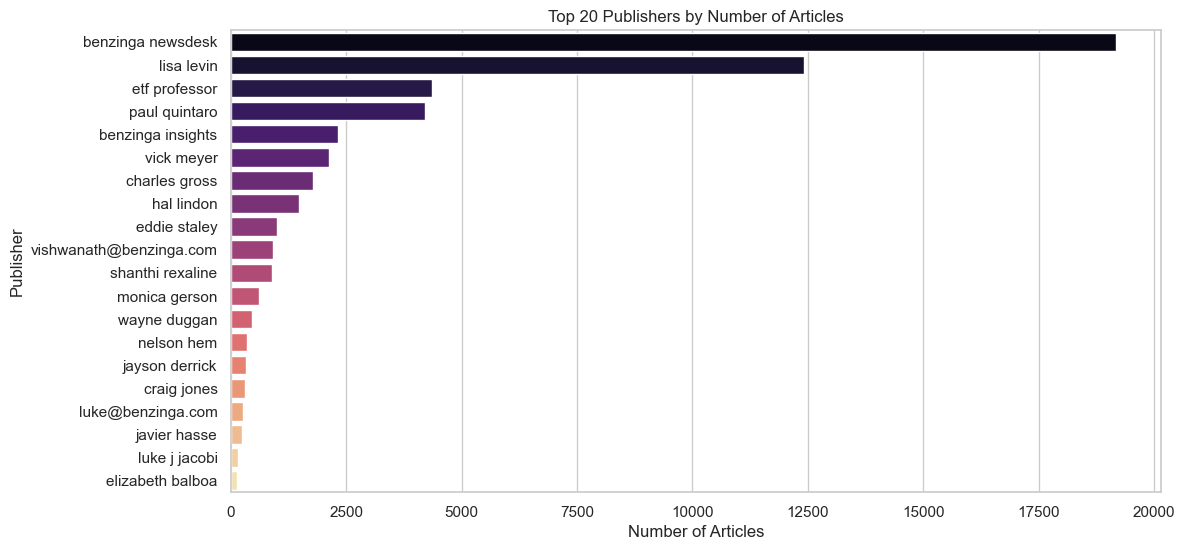

In [ ]:
#  Publisher Analysis

#  Normalize publisher names (keep emails as-is for domain analysis)
df['publisher_norm'] = (
    df['publisher']
    .str.lower()
    .str.replace(r'[_\u2000-\u200b]+', ' ', regex=True)  # underscores & special spaces → space
    .str.replace(r'\s+', ' ', regex=True)  # multiple spaces → single
    .str.strip()
)

# 2️⃣ Top 20 publishers by article count
top_publishers = df['publisher_norm'].value_counts().head(20)
print("Top 20 publishers by number of articles:")
print(top_publishers)

# Plot top publishers
plt.figure(figsize=(12,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="magma")
plt.title("Top 20 Publishers by Number of Articles")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.show()




Top 10 publisher domains:
publisher_domain
unknown         54788
benzinga.com     1196
gmail.com           3
Name: count, dtype: int64


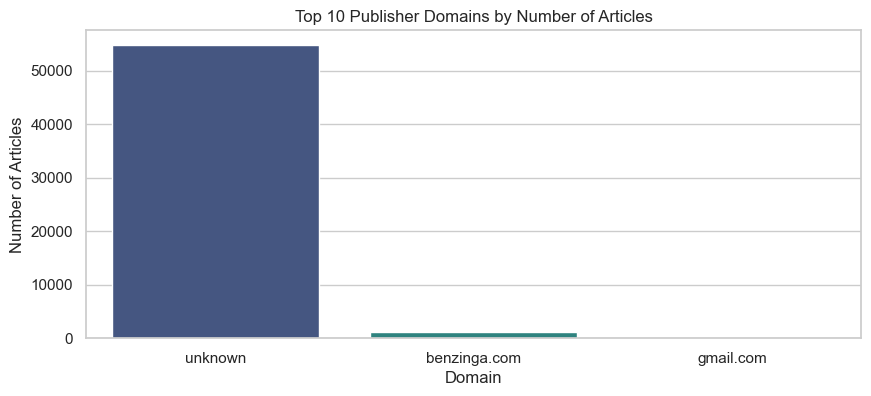

In [42]:
# 3️⃣ Extract publisher domain if email present
df['publisher_domain'] = df['publisher'].str.extract(r'@([\w\.-]+)')
df['publisher_domain'] = df['publisher_domain'].fillna('unknown')

# 4️⃣ Top 10 publisher domains
top_domains = df['publisher_domain'].value_counts().head(10)
print("\nTop 10 publisher domains:")
print(top_domains)

# Plot publisher domains
plt.figure(figsize=(10,4))
sns.barplot(x=top_domains.index, y=top_domains.values, palette="viridis")
plt.title("Top 10 Publisher Domains by Number of Articles")
plt.xlabel("Domain")
plt.ylabel("Number of Articles")
plt.show()
